# Decision Tree Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Create a synthetic dataset
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[-0.22503739,  0.24614619],
       [-0.90134669,  0.10041997],
       [-0.31789151,  1.49743315],
       ...,
       [ 0.56016606,  0.66253069],
       [-1.71563881,  2.2122948 ],
       [-0.22836284,  0.82115301]])

In [5]:
y

array([-4.89078600e+00, -5.62205537e+01,  5.12472918e+01,  1.48141684e+02,
       -6.64003447e+01, -9.16769455e+01,  9.60586397e+01,  1.08253693e+01,
        3.51483418e+01, -2.26042809e+01,  2.59615623e+01,  1.11234783e+02,
        1.01266937e+02, -9.54729033e+01, -8.44465648e+01, -6.38189434e+01,
       -1.52855739e+02,  1.20322791e+02,  1.20410907e+02, -1.47763716e+02,
        5.14051247e+01,  8.17962008e+01,  1.06609935e+00, -1.31031182e+02,
        4.54456443e+01, -7.24950746e+01,  6.02621160e+01, -7.37793080e+01,
        8.60780455e+00,  1.50238582e+02, -1.83947485e+02,  6.19300196e+01,
       -8.72236368e+01, -5.48385887e+01, -1.22632672e+02,  2.66735353e+01,
       -1.40475476e+02,  2.01386631e+02,  7.02122932e+01,  1.02773843e+02,
        1.35758325e+02,  1.51276382e+02,  5.22277171e+01, -1.12917238e+02,
        1.06631740e+02, -1.15328873e+02,  1.35308306e+02, -4.73642223e+01,
        3.20617538e+01,  5.42455096e+01, -1.16628771e+01, -6.83390781e+01,
       -6.97541344e+00,  

In [6]:
pd.DataFrame(X)[0]

0     -0.225037
1     -0.901347
2     -0.317892
3      1.577309
4     -1.665424
         ...   
995    0.792372
996    0.110920
997    0.560166
998   -1.715639
999   -0.228363
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

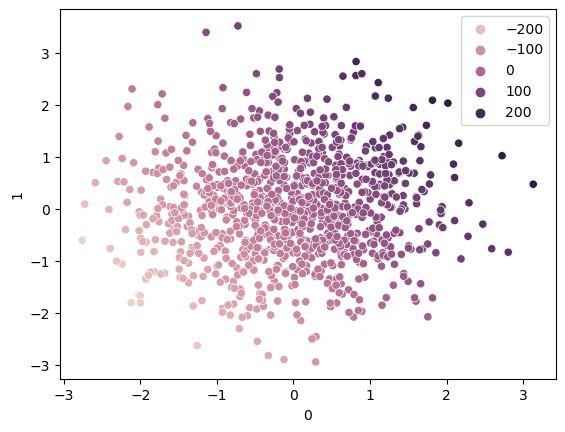

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [12]:
##train, test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=20)

In [13]:
from sklearn.svm import SVR
svr=SVR(kernel='linear')

In [14]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [15]:
y_pred=svr.predict(X_test)

In [16]:
y_pred

array([  38.49331277,   40.80489848,   38.31553581,  -88.62976103,
       -183.29280217,    3.40339105,   40.70155664,   61.64791369,
         10.88990293,   33.17592016,  -46.69586336,   35.95914514,
        135.36812965,  -27.10505508,   13.05881479,  -77.53594035,
       -115.15572161,   50.60839158,   92.14564278,  167.000548  ,
        -38.35493731,  -32.47677736,   -0.90117901,  -19.20189126,
        -42.48205432, -188.27793224,   18.14353697,   25.48837145,
        -52.24216403,  189.43740659,   73.09356684,   39.99792805,
         22.11335792,  -39.74129868,   30.90649354,   27.61867703,
        -89.9463222 ,  -51.15255915,  -46.63670844,  -64.36340616,
       -170.71694505,  -46.47928324,  228.99833643,   -7.50237325,
         13.40170002,  -65.26643387,  -84.11823356,    2.38988102,
        -35.57322344,  -14.4423984 ,   38.71991796,  179.27422309,
        -62.20936043,  114.97038386,   12.54034411,   77.48303246,
        -16.68450352,   74.20048014,   45.48554604,  -86.89966

In [17]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [18]:
score

0.9988125750107012

## Hyperparameter tuning 

In [25]:
from sklearn.model_selection import GridSearchCV

parameters={
        'C':[0.1,1,10,100,1000,0.5],
        'gamma':[1,0.1,0.01,0.0001],
        'kernel':['linear'],
        'epsilon':[0.1,0.2,0.3]
}

In [26]:
grid=GridSearchCV(svr,param_grid=parameters,refit=True,verbose=3,cv=5)

In [27]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.734 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.728 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.727 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.733 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.734 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.728 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.727 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.725 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 0.5],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [28]:
grid.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [29]:
## Prediction
y_pred1=grid.predict(X_test)

In [31]:
y_pred1

array([  38.71794088,   41.07780058,   38.54233303,  -89.08502695,
       -184.38578852,    3.38588618,   41.06483069,   62.13910902,
         11.05754383,   33.50996441,  -46.92313138,   36.3170973 ,
        136.15268175,  -27.21148474,   13.18306409,  -77.92868648,
       -115.98717818,   51.11810524,   92.69451156,  167.86290936,
        -38.76092638,  -32.4935773 ,   -0.86220846,  -19.31257947,
        -42.97354323, -189.36500487,   18.19809023,   25.67482922,
        -52.43806937,  190.49144189,   73.68221332,   40.22681263,
         22.29403316,  -39.92184522,   31.16743663,   27.89088461,
        -90.53846126,  -51.52409956,  -46.90842595,  -64.85627783,
       -171.75464484,  -46.75082888,  230.31689106,   -7.55347117,
         13.5042959 ,  -65.58390994,  -84.45763942,    2.38007085,
        -35.77885208,  -14.59521004,   39.02594263,  180.41948212,
        -62.63225191,  115.78068784,   12.64139476,   78.06811953,
        -16.71833735,   74.5773098 ,   45.69339064,  -87.38464

In [32]:
print(r2_score(y_pred,y_test))

0.9988125750107012
